In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for all graphical and plotting purposes
import seaborn as sns
import missingno as msno
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-penguins/Penguins_data.csv
/kaggle/input/pengus/pengus.png


# A good data science project must comprise of three main points in it. Data preprocessing, data visualization and data modelling. In this machine learning project, I have done the same.

# 1.Data Preprocessing
1. include essential libraries
2. import the datasets
3. handle missing or unordered data (if any)

      

# 2.Data Visualization
1. Scatterplot
2. Pairplot
3. Barplot
4. Violin Plot
5. Area Plot
6. Correlation plot (using heatmaps)

# 3.Data Modelling using ML models
1. Logistic Regression
2. Random Forest Regression
3. Naive Bayes Regression
4. K-Nearest Neighbours (KNN) Regression
5. Decision Tree Regression
6. Support Vector Machine (SVM) Regression


# Apart from these, I have also laid down a detailed comparative study for the best Machine Learning Models that can be implemented in these types of datasets

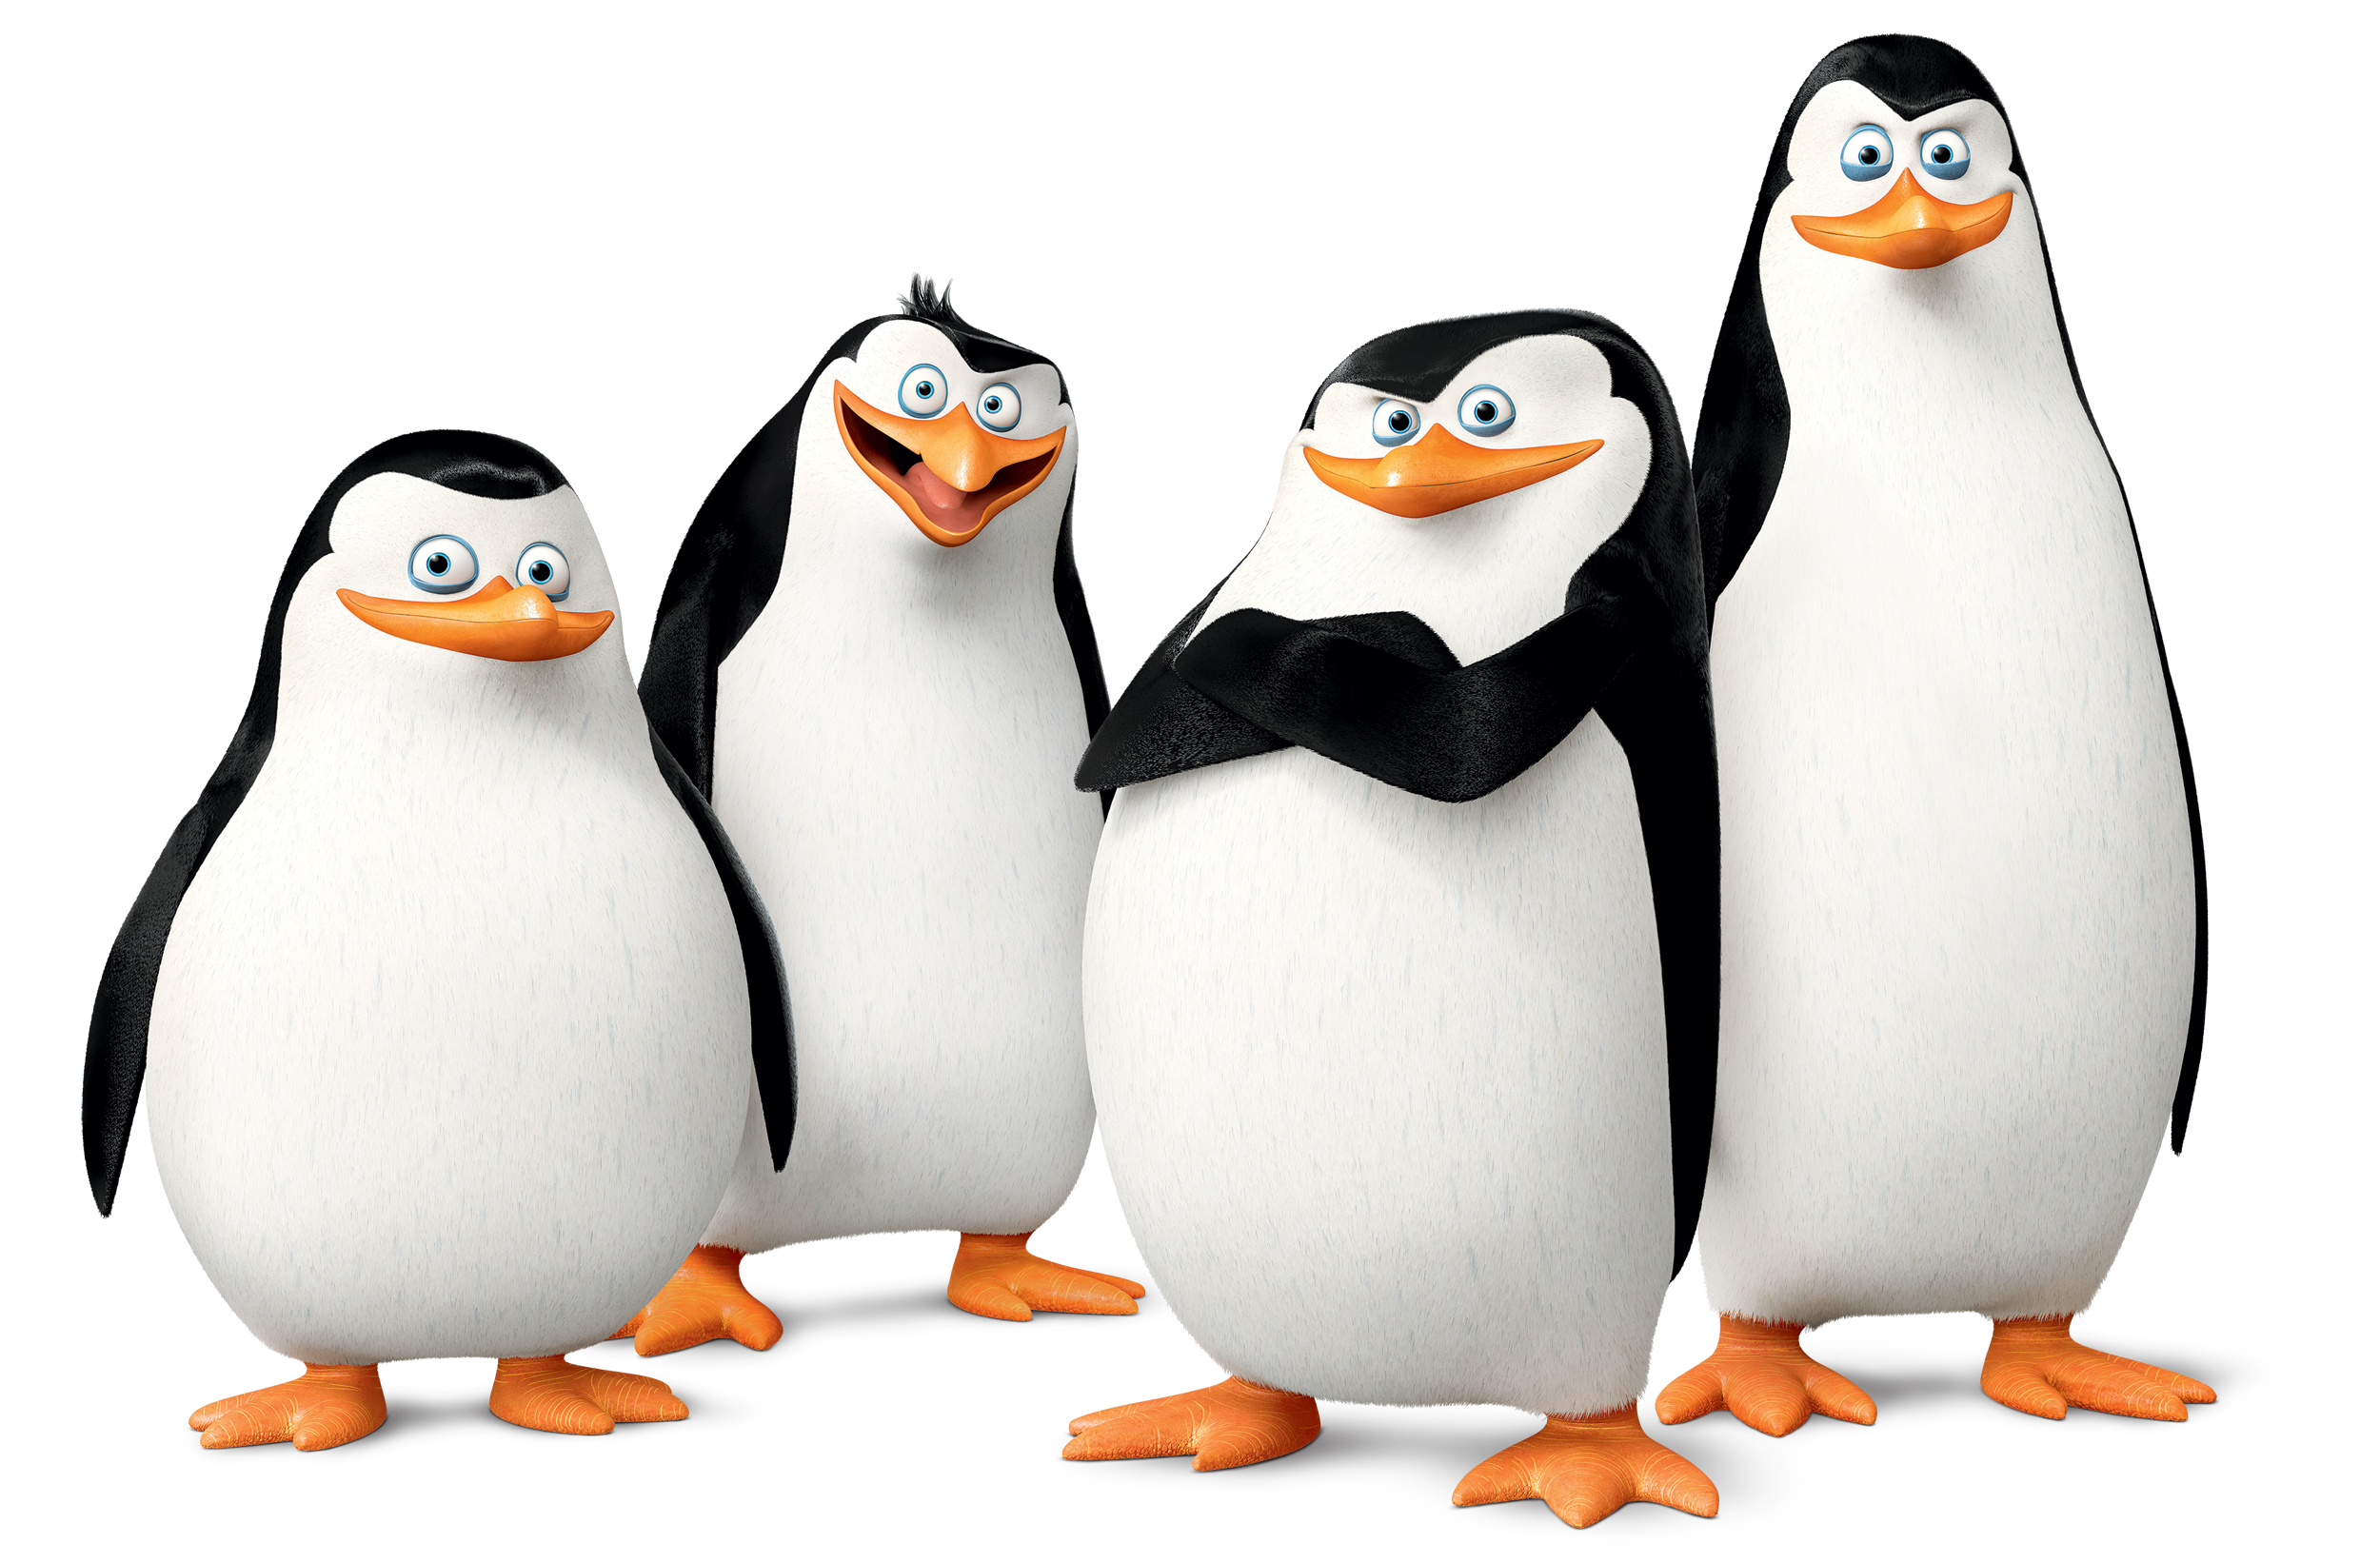

In [2]:
from IPython.display import Image
Image("../input/pengus/pengus.png")

# Penguins : They are cute, fluffy flightless birds found in the Antarctic islands, near the South Pole. Although they are introvert birds, yet you would love to find one with you :)

# 1. DATA PREPROCESSING

Making the data best fit for the job!

In [3]:
# Display list of top ten values in the dataset
pengu = pd.read_csv('../input/data-penguins/Penguins_data.csv')
pengu.head(10)
# they might be good penguins who came for an early registration :)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7                181   
1  Adelie  Torgersen            39.5           17.4                186   
2  Adelie  Torgersen            40.3           18.0                196   
3  Adelie  Torgersen            36.7           19.3                193   
4  Adelie  Torgersen            39.3           20.6                190   
5  Adelie  Torgersen            38.9           17.8                181   
6  Adelie  Torgersen            39.2           19.6                195   
7  Adelie  Torgersen            41.1           17.6                182   
8  Adelie  Torgersen            38.6           21.2                191   
9  Adelie  Torgersen            34.6           21.1                198   

   body_mass_kg     sex  
0         3.750    male  
1         3.751  female  
2         3.752  female  
3         3.753  female  
4         3.754    male  
5         3.755  female  
6         3.756    male  
7         3.757  female  
8         3.758    male  
9         3.759    male

In [4]:
# Display the unique species of penguins
print(pengu['species'].unique())

['Adelie' 'Gentoo' 'Chinstrap']


In [5]:
# Display the unique set of islands where they live
print(pengu['island'].unique())

['Torgersen' 'Biscoe' 'Dream']


In [6]:
# display informations about our data
print(pengu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    int64  
 5   body_mass_kg       333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 18.3+ KB
None


In [7]:
# Displaying a summary of dataset
pengu.describe(include="all")

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
count      333     333      333.000000     333.000000          333.00000   
unique       3       3             NaN            NaN                NaN   
top     Adelie  Biscoe             NaN            NaN                NaN   
freq       146     163             NaN            NaN                NaN   
mean       NaN     NaN       43.992793      17.164865          200.96997   
std        NaN     NaN        5.468668       1.969235           14.01459   
min        NaN     NaN       32.100000      13.100000          172.00000   
25%        NaN     NaN       39.500000      15.600000          190.00000   
50%        NaN     NaN       44.500000      17.300000          197.00000   
75%        NaN     NaN       48.600000      18.700000          213.00000   
max        NaN     NaN       59.600000      21.500000          231.00000   

        body_mass_kg   sex  
count     333.000000   333  
unique           NaN     2  
top              NaN  male  
freq             NaN   168  
mean        3.916000   NaN  
std         0.096273   NaN  
min         3.750000   NaN  
25%         3.833000   NaN  
50%         3.916000   NaN  
75%         3.999000   NaN  
max         4.082000   NaN

In [8]:
#dropping island column
pengu.drop(columns="island",inplace=True)

In [9]:
#displaying the sum of null values
print(pengu.isnull().sum())

species              0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_kg         0
sex                  0
dtype: int64


# 2. DATA VISUALIZATION

See what you plot, plot what you see...

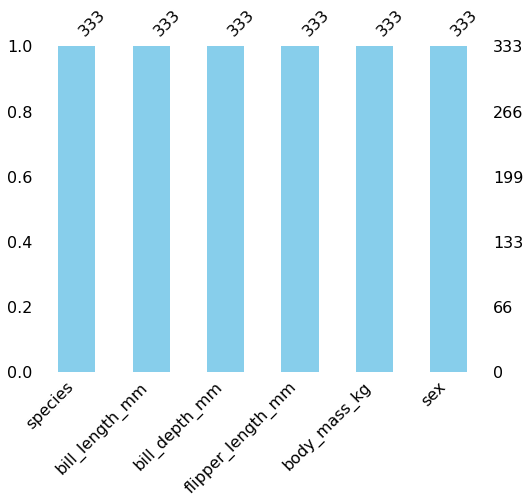

In [10]:
# A pictographical representation of the data in row-column order and total number of each data elements
import missingno as msno
msno.bar(pengu,figsize=(8,6),color='skyblue')
plt.show()

# 2.1 Scatterplot
**A scatter plot is a two-dimensional data visualization that uses dots to represent the values obtained for two different variables — one plotted along the x-axis and the other plotted along the y-axis we can plot the scatter plot between any two features. i’am taking an example of petal length and petal width.**

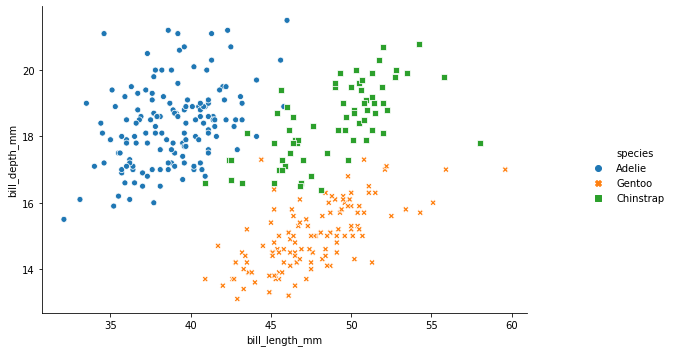

In [11]:
g=sns.relplot(x='bill_length_mm',y='bill_depth_mm',data=pengu,hue='species',style='species')
g.fig.set_size_inches(10,5)
plt.show()

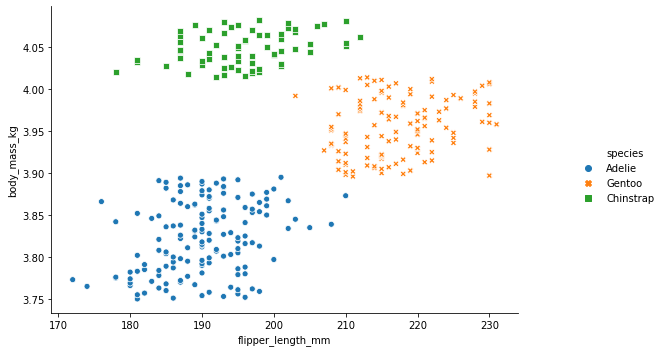

In [12]:
g=sns.relplot(x='flipper_length_mm',y='body_mass_kg',data=pengu,hue='species',style='species')
g.fig.set_size_inches(10,5)
plt.show()

# 2.2 Pairplot
**Pair Plots are a really simple (one-line-of-code simple!) way to visualize relationships between each variable. It produces a matrix of relationships between each variable in your data for an instant examination of our data. pair plot gives scatter plot of different features. pair plot for iris data set.**



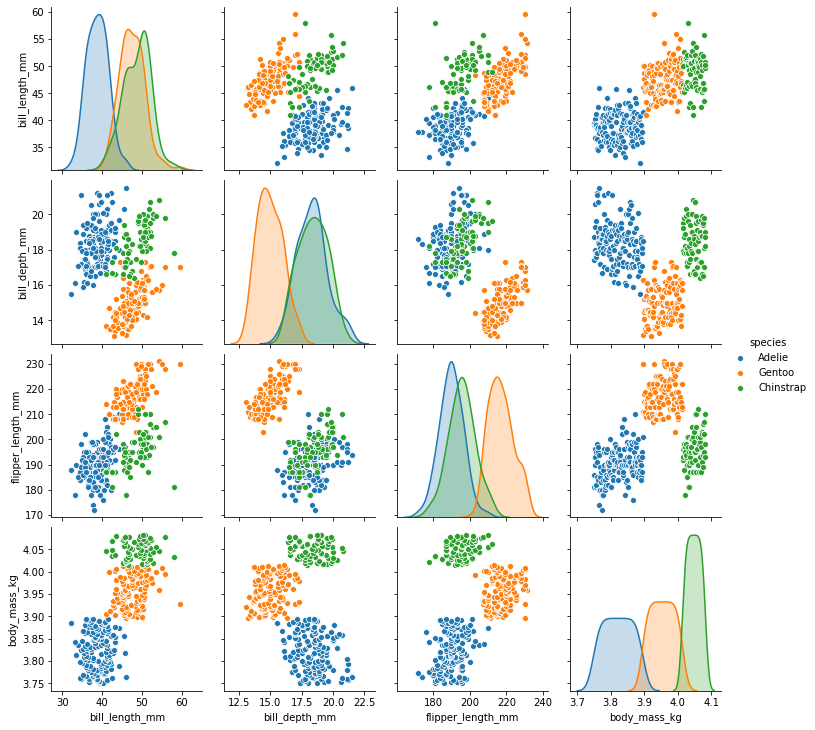

In [13]:
sns.pairplot(pengu,hue="species")
plt.show()

# 2.3 BoxPlot
**Boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”). It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.**

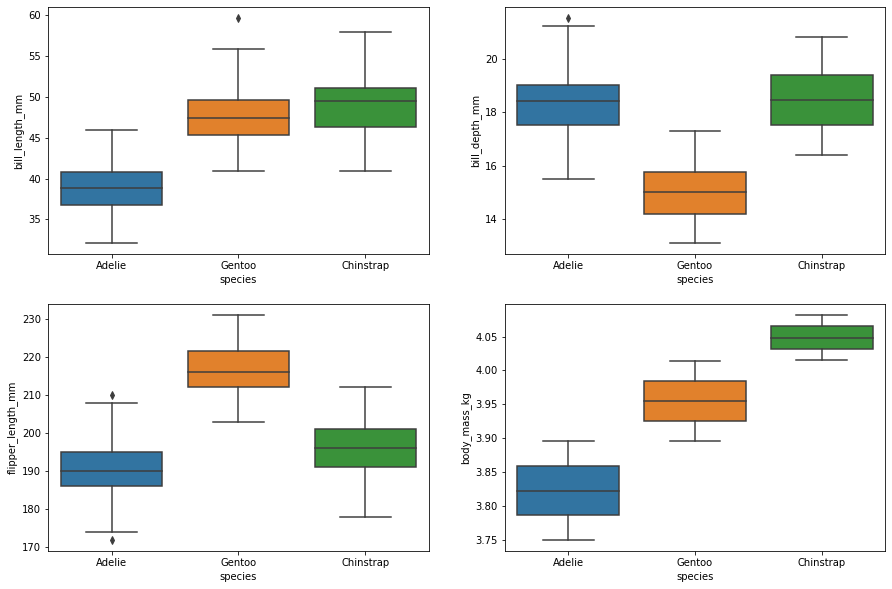

In [14]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x='species',y='bill_length_mm',data=pengu)
plt.subplot(2,2,2)
sns.boxplot(x='species',y='bill_depth_mm',data=pengu)
plt.subplot(2,2,3)
sns.boxplot(x='species',y='flipper_length_mm',data=pengu)
plt.subplot(2,2,4)
sns.boxplot(x='species',y='body_mass_kg',data=pengu)
plt.show()

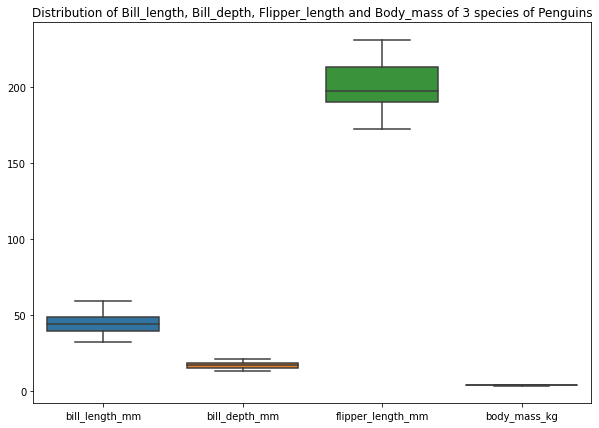

In [15]:
plt.subplots(figsize=(10,7))
sns.boxplot(data=pengu).set_title("Distribution of Bill_length, Bill_depth, Flipper_length and Body_mass of 3 species of Penguins")
plt.show()

# 2.4 Violin
**Violin Plot is a method to visualize the distribution of numerical data of different variables. It is similar to Box Plot but with a rotated plot on each side, giving more information about the density estimate on the y-axis. The density is mirrored and flipped over and the resulting shape is filled in, creating an image resembling a violin. The advantage of a violin plot is that it can show nuances in the distribution that aren’t perceptible in a boxplot. On the other hand, the boxplot more clearly shows the outliers in the data.**

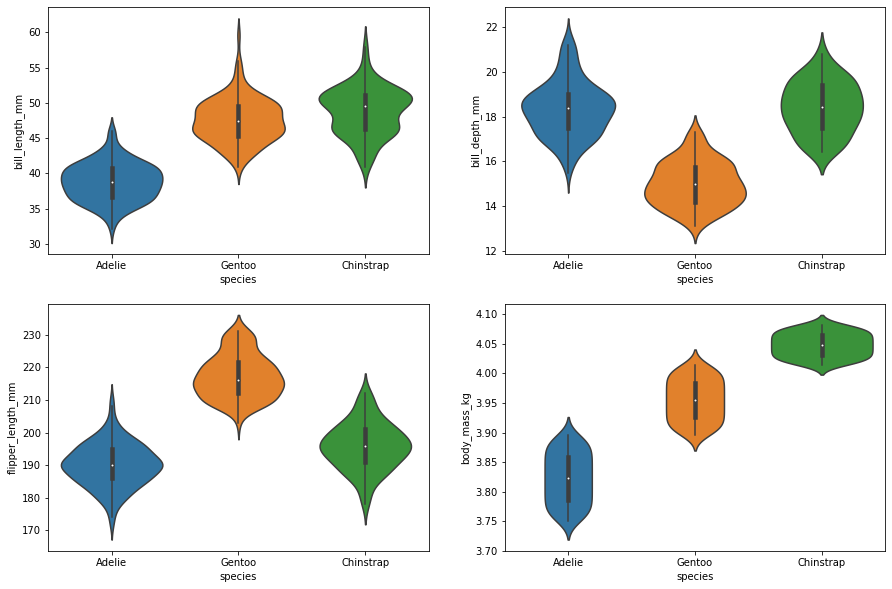

In [16]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='bill_length_mm',data=pengu)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='bill_depth_mm',data=pengu)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='flipper_length_mm',data=pengu)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='body_mass_kg',data=pengu)
plt.show()

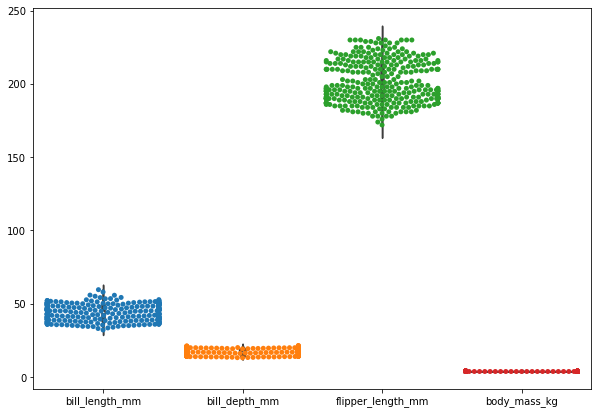

In [17]:
plt.subplots(figsize=(10,7))
sns.violinplot(data=pengu)
sns.swarmplot( data=pengu)
plt.show()

# 2.5 Area Plot
**Area Plot gives us a visual representation of Various dimensions of Iris flower and their range in dataset.**



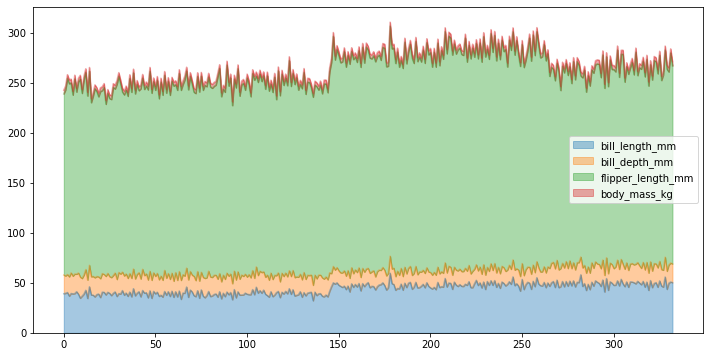

In [18]:
pengu.plot.area(y=['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_kg'],alpha=0.4,figsize=(12, 6));

Since the body_mass is in a scale of thousands and other parameters are much smaller we get this sort of data visualisation outcomes. But there is nothing wrong here. If we reduce the body_mass_g column parameters to a body_mass_kg, then we can achieve a comparable plot. 

# 2.6 Correlation
**Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.**


In [19]:
pengu.corr()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.228626           0.653005   
bill_depth_mm           -0.228626       1.000000          -0.577749   
flipper_length_mm        0.653005      -0.577749           1.000000   
body_mass_kg             0.764000      -0.251911           0.444360   

                   body_mass_kg  
bill_length_mm         0.764000  
bill_depth_mm         -0.251911  
flipper_length_mm      0.444360  
body_mass_kg           1.000000

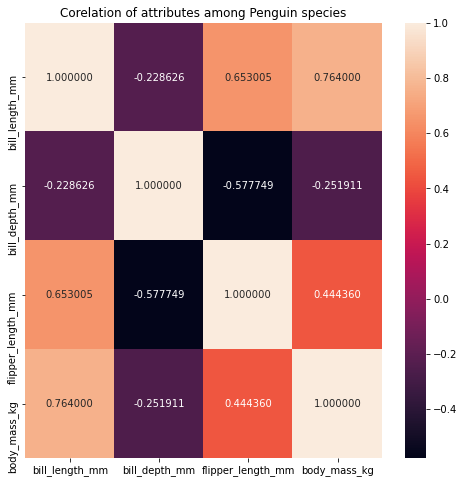

In [20]:
plt.subplots(figsize = (8,8))
sns.heatmap(pengu.corr(),annot=True,fmt="f").set_title("Corelation of attributes among Penguin species")
plt.show()

# 3. Building Machine Learning Models

In [21]:
X=pengu.iloc[:,1:5].values
y=pengu.iloc[:,5].values

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# 3.1 Random Forest:
**Random forest, like its name implies, consists of a large number of individual decision trees that operate as an ensemble. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction.
A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.**

In [24]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)
accuracy_rf=round(accuracy_score(y_test,Y_prediction)* 100, 2)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_prediction)
accuracy = accuracy_score(y_test,Y_prediction)
precision =precision_score(y_test, Y_prediction,average='micro')
recall =  recall_score(y_test, Y_prediction,average='micro')
f1 = f1_score(y_test,Y_prediction,average='micro')
print('Confusion matrix for Random Forest\n',cm)
print('accuracy_random_Forest : %.3f' %accuracy)
print('precision_random_Forest : %.3f' %precision)
print('recall_random_Forest : %.3f' %recall)
print('f1-score_random_Forest : %.3f' %f1)

Confusion matrix for Random Forest
 [[48  7]
 [ 3 42]]
accuracy_random_Forest : 0.900
precision_random_Forest : 0.900
recall_random_Forest : 0.900
f1-score_random_Forest : 0.900


# 3.2 Logistic Regression:
**Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.**

**We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.**

In [25]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[46  9]
 [ 4 41]]
accuracy_Logistic Regression : 0.870
precision_Logistic Regression : 0.870
recall_Logistic Regression: 0.870
f1-score_Logistic Regression : 0.870


# 3.3 K Nearest Neighbor:
**K-Nearest Neighbour is one of the simplest Machine Learning algorithms based on Supervised Learning technique.**

**K-NN algorithm assumes the similarity between the new case/data and available cases and put the new case into the category that is most similar to the available categories.**

**K-NN algorithm stores all the available data and classifies a new data point based on the similarity. This means when new data appears then it can be easily classified into a well suite category by using K- NN algorithm.**

In [26]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test) 
accuracy_knn=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for KNN\n',cm)
print('accuracy_KNN : %.3f' %accuracy)
print('precision_KNN : %.3f' %precision)
print('recall_KNN: %.3f' %recall)
print('f1-score_KNN : %.3f' %f1)

Confusion matrix for KNN
 [[41 14]
 [ 1 44]]
accuracy_KNN : 0.850
precision_KNN : 0.850
recall_KNN: 0.850
f1-score_KNN : 0.850


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until


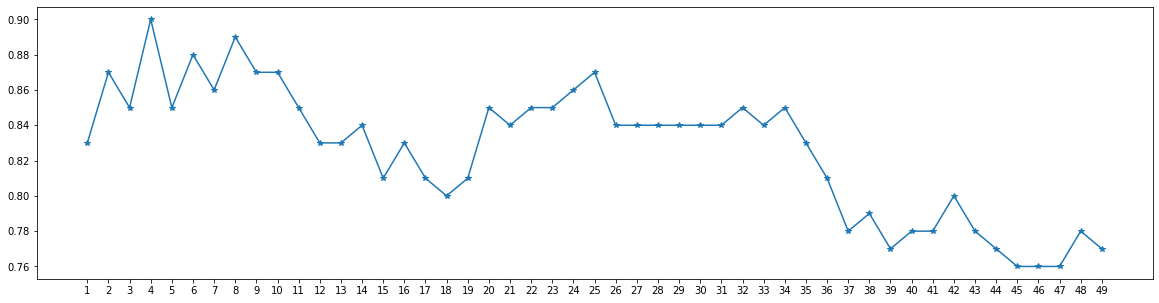

In [27]:
plt.subplots(figsize=(20,5))
a_index=list(range(1,50))
a=pd.Series()
x=range(1,50)
#x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,50)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(X_train, y_train) 
    prediction=model.predict(X_test)
    a=a.append(pd.Series(accuracy_score(y_test,prediction)))
plt.plot(a_index, a,marker="*")
plt.xticks(x)
plt.show()

# 3.4 Gaussian Naive Bayes:
**Naive Bayes is a classification algorithm for binary (two-class) and multi-class classification problems. The technique is easiest to understand when described using binary or categorical input values.**

**It is called naive Bayes or idiot Bayes because the calculation of the probabilities for each hypothesis are simplified to make their calculation tractable. Rather than attempting to calculate the values of each attribute value P(d1, d2, d3|h), they are assumed to be conditionally independent given the target value and calculated as P(d1|h) * P(d2|H) and so on.**

**This is a very strong assumption that is most unlikely in real data, i.e. that the attributes do not interact. Nevertheless, the approach performs surprisingly well on data where this assumption does not hold.**

In [28]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test) 
accuracy_nb=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Naive Bayes\n',cm)
print('accuracy_Naive Bayes: %.4f' %accuracy)
print('precision_Naive Bayes: %.4f' %precision)
print('recall_Naive Bayes: %.4f' %recall)
print('f1-score_Naive Bayes : %.4f' %f1)

Confusion matrix for Naive Bayes
 [[45 10]
 [ 6 39]]
accuracy_Naive Bayes: 0.8400
precision_Naive Bayes: 0.8400
recall_Naive Bayes: 0.8400
f1-score_Naive Bayes : 0.8400


# 3.5 Linear Support Vector Machine:
**Support Vector Machine” (SVM) is a supervised machine learning algorithm which can be used for both classification or regression challenges. However, it is mostly used in classification problems. In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. Then, we perform classification by finding the hyper-plane that differentiates the two classes very well**

In [29]:
linear_svc = LinearSVC(max_iter=4000)
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_svc=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_linear_svc = round(linear_svc.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for SVC\n',cm)
print('accuracy_SVC: %.2f' %accuracy)
print('precision_SVC: %.2f' %precision)
print('recall_SVC: %.2f' %recall)
print('f1-score_SVC : %.2f' %f1)

Confusion matrix for SVC
 [[ 2 53]
 [ 0 45]]
accuracy_SVC: 0.47
precision_SVC: 0.47
recall_SVC: 0.47
f1-score_SVC : 0.47


/opt/conda/lib/python3.7/site-packages/sklearn/svm/_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


# 3.6 Decision Tree:
**A decision tree is a flowchart-like structure in which each internal node represents a test on a feature (e.g. whether a coin flip comes up heads or tails) , each leaf node represents a class label (decision taken after computing all features) and branches represent conjunctions of features that lead to those class labels. The paths from root to leaf represent classification rules.**

In [30]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, y_train)  
Y_pred = decision_tree.predict(X_test) 
accuracy_dt=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_decision_tree = round(decision_tree.score(X_train, y_train) * 100, 2)

cm = confusion_matrix(y_test, Y_pred)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for DecisionTree\n',cm)
print('accuracy_DecisionTree: %.3f' %accuracy)
print('precision_DecisionTree: %.3f' %precision)
print('recall_DecisionTree: %.3f' %recall)
print('f1-score_DecisionTree : %.3f' %f1)

Confusion matrix for DecisionTree
 [[43 12]
 [ 8 37]]
accuracy_DecisionTree: 0.800
precision_DecisionTree: 0.800
recall_DecisionTree: 0.800
f1-score_DecisionTree : 0.800


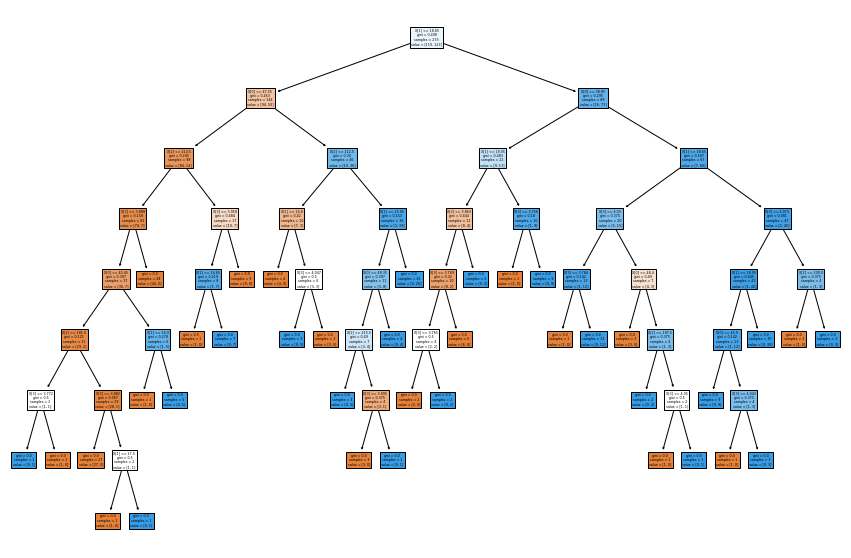

In [31]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15,10))
plot_tree(decision_tree.fit(X_train, y_train)  ,filled=True)
plt.show()

# Now, which is the best Model ?

In [32]:
results = pd.DataFrame({
    'Model': [ 'KNN', 
              'Logistic Regression', 
              'Random Forest',
              'Naive Bayes',  
              ' Support Vector Machine', 
              'Decision Tree'],
    'Score': [ acc_knn,
              acc_log, 
              acc_random_forest,
              acc_gaussian,  
              acc_linear_svc,
              acc_decision_tree],
    "Accuracy_score":[accuracy_knn,
                      accuracy_lr,
                      accuracy_rf,
                      accuracy_nb,
                      accuracy_svc,
                      accuracy_dt
                     ]})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.reset_index(drop=True)
result_df.head(7)

Model   Score  Accuracy_score
0            Random Forest  100.00            90.0
1      Logistic Regression   81.12            87.0
2                      KNN   85.84            85.0
3              Naive Bayes   81.97            84.0
4            Decision Tree  100.00            80.0
5   Support Vector Machine   52.79            47.0

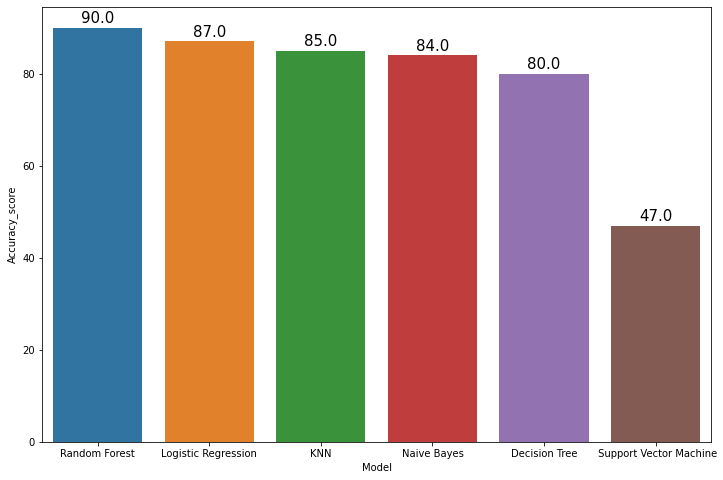

In [33]:
plt.subplots(figsize=(12,8))
ax=sns.barplot(x='Model',y="Accuracy_score",data=result_df)
labels = (result_df["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+1, str(v), horizontalalignment = 'center', size = 15, color = 'black')

# OBSERVATION : In this data model, the best prediction has been provided by the Random Forest Regression model of Machine Learning. This could be well understood from the heatmap of this dataset and the variance of parameters over there. 

# Please Upvote if you find this useful 😊

Special thanks to **Allison Horst** who packaged it as an R package palmerpenguins under CC-0 license, and the Youtuber **Data Professor Chanin** who provided the resource of this dataset